In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense, Dropout

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data = pd.read_csv(r'/content/gdrive/My Drive/train.csv')
test = pd.read_csv(r'/content/gdrive/My Drive/test.csv')
data.dropna()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [ ]:
data.head() #accessing the first 5 rows of the data

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [ ]:
print(data.shape) #accessing the shape and columns of the data
print(list(data.columns))

(31647, 18)
['ID', 'age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'subscribed']


In [ ]:
 #accessing all unique categories of education 
 data['education'].unique()

array(['unknown', 'secondary', 'tertiary', 'primary'], dtype=object)

In [ ]:
data['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

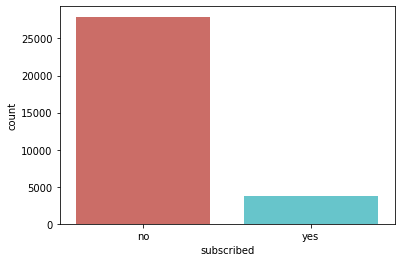

<Figure size 432x288 with 0 Axes>

In [ ]:
#data exploration
sns.countplot(x='subscribed',data=data,palette='hls')
plt.show()
plt.savefig('count_plot')

In [ ]:
not_subbed = len(data[data['subscribed']=='no'])
subbed = len(data[data['subscribed']=='yes'])
percent_not_subbed = not_subbed/(not_subbed+subbed)
percent_subbed = subbed/(not_subbed+subbed)

In [ ]:
print("Percentage of subscribers:",percent_subbed*100)

Percentage of subscribers: 11.73886940310298


In [ ]:
print("Percentage of non-subscribers:",percent_not_subbed*100)

Percentage of non-subscribers: 88.26113059689702


In [ ]:
data.groupby('subscribed').mean()

,ID,age,balance,day,duration,campaign,pdays,previous
subscribed,,,,,,,,
no,21149.294071,40.862165,1307.779822,15.925462,221.559108,2.845876,35.653802,0.496456
yes,33200.523553,41.672140,1785.768237,15.158816,532.955585,2.162853,69.066218,1.159354


In [ ]:
#average age of people subscribed to term deposit > average age of people not subscribed to term deposit
#campaigning for those who subbed is less :O
#something which is surprising is: pdays of those who subbed is more than those who havent subscribed
#calls made previously before campaigning for those who subbed is higher , makes sense
#call duration is significantly higher for people who subscribed
#bank balance of people who subscribed is higher.

In [ ]:
#this means calls made before campaigning is crucial for subscriptions

Text(0, 0.5, 'Subscriber frequency')

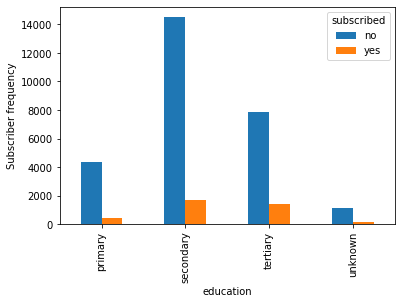

In [ ]:
%matplotlib inline
pd.crosstab(data.education,data.subscribed).plot(kind='bar')
plt.ylabel('Subscriber frequency')

In [ ]:
#people who have studied secondary education and tertiary education seem to have maximum subscribers (education is key factor here)

In [ ]:
print(list(data.columns))

['ID', 'age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'subscribed']


Text(0, 0.5, 'subscriber frequency')

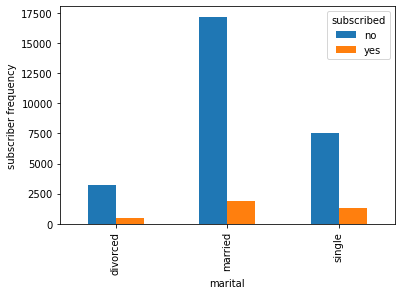

In [ ]:
pd.crosstab(data.marital,data.subscribed).plot(kind='bar')
plt.ylabel('subscriber frequency')

In [ ]:
#married and single people are subscribing more. marital status important

In [ ]:
data['housing'].unique()

array(['no', 'yes'], dtype=object)

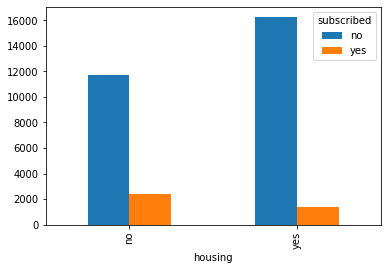

In [ ]:
pd.crosstab(data.housing,data.subscribed).plot(kind='bar')

In [ ]:
#those who dont have housing loan subscibred to term deposit more. still the difference is not high, but can be considered

In [ ]:
data['loan'].unique()

array(['no', 'yes'], dtype=object)

Text(0, 0.5, 'Subscriber frequency')

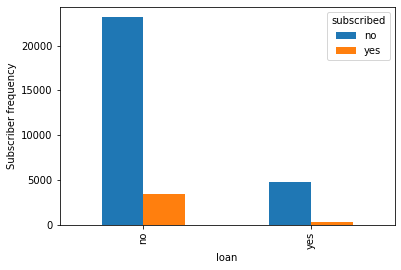

In [ ]:
pd.crosstab(data.loan,data.subscribed).plot(kind='bar')
plt.ylabel('Subscriber frequency')

In [ ]:
#wow signifincant difference when it comes to personal loan. those who dont have a personal loan went for term deposot more. very very crucial

In [ ]:
data['contact'].unique()

array(['telephone', 'cellular', 'unknown'], dtype=object)

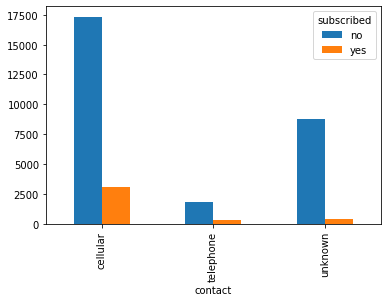

In [ ]:
pd.crosstab(data.contact,data.subscribed).plot(kind='bar')

In [ ]:
#again significant difference when contacted through cellular. interesting...

In [ ]:
data['poutcome'].unique()

array(['unknown', 'success', 'failure', 'other'], dtype=object)

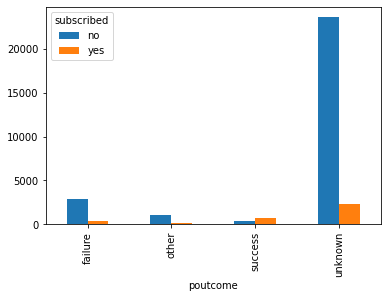

In [ ]:
pd.crosstab(data.poutcome,data.subscribed).plot(kind='bar')

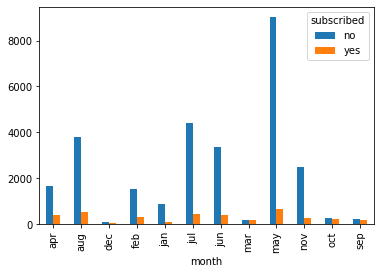

In [ ]:
pd.crosstab(data.month,data.subscribed).plot(kind='bar')

Text(0, 0.5, 'frequency of customers')

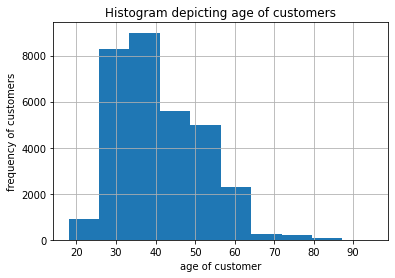

In [ ]:
data.age.hist()
plt.title('Histogram depicting age of customers')
plt.xlabel('age of customer')
plt.ylabel('frequency of customers')

In [ ]:
#30-40 is the age range of max customers.

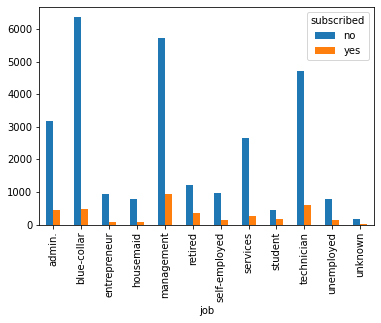

In [ ]:
pd.crosstab(data.job,data.subscribed).plot(kind='bar')

In [ ]:
#job profile is crucial

In [ ]:
print(list([data.columns]))
data['default'].unique()
categorical_vars=['job','marital','education','default','housing','loan','contact','poutcome','subscribed']

[Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')]


In [ ]:
train = pd.get_dummies(data)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val= train_test_split(train, target, test_size=0.2, random_state=12)

In [ ]:
logreg=LogisticRegression()

In [ ]:
logreg.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
prediction = logreg.predict(x_val)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_val, prediction)

0.8902053712480252

In [ ]:
#we have an accuracy score of 90%. Logistic regression has a linear decision boundary.We need a model to capture non-linearity.


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier(max_depth=4, random_state=0)

In [ ]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [ ]:
predict = clf.predict(x_val)

In [ ]:
accuracy_score(y_val, predict) #100% accuracy score 

1.0